<h1>TensorBoard Tutorial</h1>

In [1]:
%load_ext tensorboard

In [2]:
import tensorflow as tf
import tensorboard
from datetime import datetime
from packaging import version
import numpy as np
import matplotlib.pyplot as plt
import io

In [3]:
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."
print("TensorBoard version: ", tensorboard.__version__)

TensorFlow version:  2.4.1
TensorBoard version:  2.4.1


<h3>We remove previous "logs". Log files are the files created and read by tensorboard. These files keep the information we instruct it to keep; such as the loss function vs epoch, or images and figures we want to present.</h3>

In [4]:
rm -rf ./logs/

Let's define a simple model to test

In [5]:
# Define the model.
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [6]:
(train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0

<h3>Now, before we fit the model, we create the log directory and the tensorboard_callback. This will be specified in the model.fit so that we connect model and tensorboard.</h3>

In [7]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq = 0, write_graph = True, write_images = True)
file_writer = tf.summary.create_file_writer(logdir)


In [8]:

# Train the model.
model.fit(
    train_images,
    train_labels, 
    batch_size=64,
    epochs=5, 
    callbacks=[tensorboard_callback])

Epoch 1/5
938/938 [==============================] - 1s 775us/step - loss: 0.8045 - accuracy: 0.7566
Epoch 2/5
938/938 [==============================] - 1s 760us/step - loss: 0.3166 - accuracy: 0.9077
Epoch 3/5
938/938 [==============================] - 1s 777us/step - loss: 0.2655 - accuracy: 0.9231
Epoch 4/5
938/938 [==============================] - 1s 764us/step - loss: 0.2371 - accuracy: 0.9294
Epoch 5/5
938/938 [==============================] - 1s 685us/step - loss: 0.2221 - accuracy: 0.9320


<h3>Let's imagine we have a figure we want to add to tensorboard. We can only add images to tensorboard and therefore we need some helper functions to convert our matplotlib figure into a png file.</h3>

In [9]:
def sample_figure():
    x = np.linspace(0,5,100)
    y = np.exp(x) 
    for i in np.arange(y.size):
        y[i] += 30*(np.random.random()-0.5)

    plt.style.use('Solarize_Light2')
    num_plots = (2,2)
    fig, axs = plt.subplots(num_plots[0],num_plots[1],figsize=(15,10), edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    fig.suptitle('Sample Test Data', fontsize = 15)
    axs = axs.ravel()

    for i in np.arange(num_plots[0]*num_plots[1]):

        axs[i].scatter(x,y*i/2)

    return fig

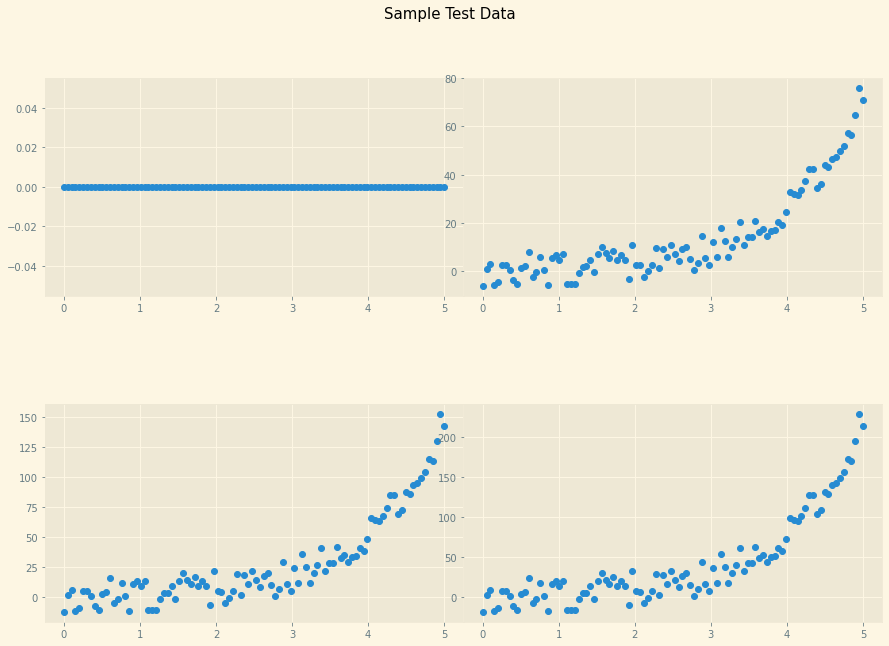

In [10]:
figure_test = sample_figure()

<h3>We have the helper function to convert this image into a png file. Note that this will return a tensorflow tensor and not a conventional png file. Therefore if we try to plt.imshow() the outcome of th ebelow function, we will receive an error.</h3>

<h3>The useful part of this is that for instance we can also add the confusion matrices or any other necessary information about our project as images.</h3>

In [11]:

def plot_to_image(figure):
  
    '''
    Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. 
    '''
    # Save the plot to a PNG in memory.
    buf = io.BytesIO()
    figure.savefig(buf, format='png')
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    # Convert PNG buffer to TF image
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    # Add the batch dimension
    image = tf.expand_dims(image, 0)
    return image



In [12]:
with file_writer.as_default():
    tf.summary.image("Test Data", plot_to_image(figure_test), step=0)

<h3>Supposedly inline tensorboard should work in jupyter however sometimes there are issues. In that case make sure you have tensorboard downloaded in the environment and run the following command in the terminal:

tensorboard --logdir /path/to/logs/directory</h3>

In [13]:
%tensorboard --logdir logs
